In [12]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_dataset
from matplotlib import cm
from matplotlib import rcParams
import pickle

There will be three rows and three columns of subplots in the figure. Each row represents a test dataset.
The column of subplots show the predicted capacity trajectories together with the observed capacity trajectories.
The second column shows the histogram of the MAEQ
The third coln shows the histogram of MAEEoL.

In [13]:
# data preparation
# MAEQs, MAElife, predicted capacity trajectories, and actual capacity trajectories for each dataset
# MAEQs = [MAEQtrain, MAEQtest1, MAEQtest1, MAEQtest2]
# MAEEoLs = [MAEEoL_train, MAEEoL_test1, MAEEoL_test2, MAEEoL_test3]
# caps_all = [caps_train, caps_test1, caps_test1, caps_test2, caps_test3]

In [14]:
def load_data_for_cap_pred_plots(model_name, dataset_name):
    if dataset_name == "169 LFP":
        dataset_ids = [i for i in range(4)]
    elif dataset_name == "48 NMC":
        dataset_ids = [i for i in range(2)]
    Q_metric_file_path = "End to End Framework/All metrics/" + dataset_name + '/' +model_name + "/Q_rmse_mae_mape.pkl"
    with open(Q_metric_file_path, 'rb') as file:
        myvar = pickle.load(file)
    MAEQs = myvar[1]
    life_metric_file_path = "End to End Framework/All metrics/" + dataset_name + '/' + model_name + "/life_ae.pkl"
    with open(life_metric_file_path, 'rb') as file:
        myvar = pickle.load(file)
    AEEoLs = myvar
    caps_file_path = "End to End Framework/All predictions/" + dataset_name + '/' + model_name + "/times_caps_caps_pred.pkl"
    with open(caps_file_path, 'rb') as file:
        myvar = pickle.load(file)
    time_all, caps_all, caps_pred = myvar[0], myvar[1], myvar[2]
    return MAEQs, AEEoLs, time_all, caps_all, caps_pred

In [15]:
model = "E2E-ENN-deltaQ"
dataset = "48 NMC"
MAEQs, AEEoLs, time_all, caps_all, caps_pred_all = load_data_for_cap_pred_plots(model, dataset)
max_cycle_life = 2500 if dataset == "169 LFP" else 1600
min_cap = 0.85 if dataset == "169 LFP" else 1.0
max_cap = 1.1 if dataset == "169 LFP" else 1.9
xticks = [0, 500, 1000, 1500, 2000, 2500] if dataset == "169 LFP" else [0, 500, 1000, 1500]
yticks = [0.8, 0.9, 1.0, 1.1] if dataset == "169 LFP" else [1.0, 1.4, 1.8]

In [16]:
# second, draw random cells
selected_cells_all = []
num_selected_cells = 3
for data_id in range(len(MAEQs)):
    np.random.seed(7)
    idx = np.arange(0, MAEQs[data_id].shape[0])
    np.random.shuffle(idx)
    selected_cells_all.append(idx[0:num_selected_cells])

In [17]:
selected_cells_all

[array([ 9,  1, 21]), array([8, 5, 0])]

In [18]:
# select cells based on MAEQ pecentile
num_selected_cells = 3
selected_cells_all = []
q = [0, 50, 100]
for MAEQ in MAEQs:
    pcens = np.percentile(MAEQ, q)
    cells = []
    for pcen in pcens:
        i_near=abs(MAEQ-pcen).argmin()
        cells.append(i_near)
    selected_cells_all.append(cells)

In [19]:
selected_cells_all

[[5, 27, 21], [1, 0, 3]]

plt settings

In [20]:
fontSize = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'Arial'
plt.rcParams["legend.loc"] = 'lower left'
fontdict = {'fontsize': fontSize,
 'horizontalalignment': 'left'}
rcParams['figure.autolayout'] = True
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = fontSize
rcParams['legend.fontsize'] = fontSize
rcParams['legend.frameon'] = False
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
# rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["legend.loc"] = 'lower left'

rcParams['pdf.fonttype'] = 42

rcParams['ps.fonttype'] = 42
sz = 15

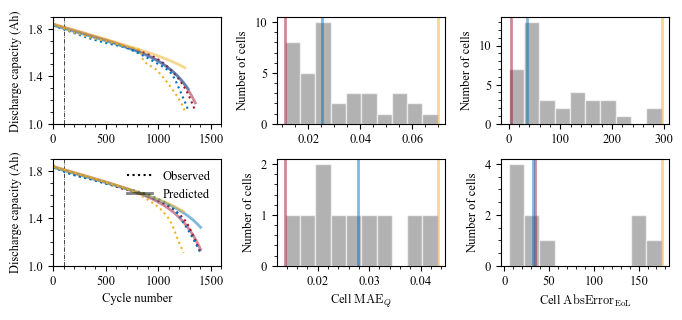

In [21]:
ncol = 3
nrow = len(caps_all)
width_subplot = 2.3
height_subplot = 1.6
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(width_subplot * ncol, height_subplot * nrow))
# colors = ['tab:blue', 'tab:red', 'yellow']
colors = ['#A2142F', '#0072BD', '#EDB120', '#7E2F8E', '#77AC30']
# first plot the histograms
for data_id, (MAEQ, MAEEOL) in enumerate(zip(MAEQs, AEEoLs)):
    axs[data_id][1].hist(MAEQ, bins=10, color="gray", alpha=0.6, edgecolor='white', linewidth=1)
    axs[data_id][2].hist(MAEEOL, bins=10, color="gray", alpha=0.6, edgecolor='white', linewidth=1)
    for idx, cell in enumerate(selected_cells_all[data_id]):
        axs[data_id][1].axvline(x=MAEQ[cell], color = colors[idx], linestyle="-", linewidth=2, alpha=0.5)
        axs[data_id][2].axvline(x=MAEEOL[cell], color = colors[idx], linestyle="-", linewidth=2, alpha=0.5)

    # axs[data_id][1].set_xlim([0, 1])
    # axs[data_id][2].set_xlim([0, 10])
    # axs[data_id][1].set_ylim([0, 1])
    # axs[data_id][2].set_ylim([0, 10])
    axs[data_id][1].tick_params(axis='both', labelsize=fontSize)
    axs[data_id][2].tick_params(axis='both', labelsize=fontSize)
    axs[data_id][1].set_ylabel('Number of cells', fontsize=fontSize)
    axs[data_id][2].set_ylabel('Number of cells', fontsize=fontSize)
axs[data_id][1].set_xlabel('Cell $\mathrm{MAE}_Q$', fontsize=fontSize)
axs[data_id][2].set_xlabel('Cell $\mathrm{AbsError}_{\mathrm{EoL}}$', fontsize=fontSize)

# second, plot capacity trajectories
for data_id, (time_cells, caps_cells, caps_pred_cells) in enumerate(zip(time_all, caps_all, caps_pred_all)):
    axs[data_id][0].set_xlim([0, max_cycle_life])
    axs[data_id][0].set_ylim([min_cap, max_cap])
    axs[data_id][0].axvline(x=100, color = 'k', linestyle="-.", linewidth=0.5)
    axs[data_id][0].set_ylabel('Discharge capacity (Ah)', fontsize=fontSize)
    axs[data_id][0].tick_params(axis='both', labelsize=fontSize)
    axs[data_id][0].set_xticks(xticks)
    axs[data_id][0].set_yticks(yticks)
    # axs[data_id][0].grid()
    for idx, cell in enumerate(selected_cells_all[data_id]):
        axs[data_id][0].plot(time_cells[cell, :], caps_cells[cell, :], color = colors[idx], linestyle=':', linewidth=1.5)
        axs[data_id][0].plot(time_cells[cell, :], caps_pred_cells[cell, :], color = colors[idx],
                             linestyle='-', linewidth=2, alpha=0.5)
axs[data_id][0].set_xlabel('Cycle number', fontsize=fontSize)
axs[data_id][0].plot(0, 0, color = "black", linewidth=1.5, linestyle=':', label="Observed")
axs[data_id][0].plot(0, 0, color = "black", linestyle='-', linewidth=2, alpha=0.5, label="Predicted")
axs[data_id][0].legend(loc="upper right")
# axs[data_id][0].legend()

# Set frame color
# axs.spines['bottom'].set_color('k')
# axs.spines['left'].set_color('k')
# axs.spines['top'].set_color('gray')
# axs.spines['right'].set_color('gray')
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [ ]:
fig.savefig('predicted_capacity_trajectories-' + model + '-' + dataset + '.png', dpi=1000, bbox_inches='tight')